In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as sci
import scipy.constants as constants

In [2]:
h = constants.h
c = constants.c
e = constants.e
k = constants.k

In [3]:
R = pd.read_csv("DB35_Tungsten_7", header=2, sep='\t')
PL = pd.read_csv("T=12_2", header=2, sep='\t')
Bulk = pd.read_csv("run1-Copy1", header=2, sep='\t')

In [ ]:
for df in [R, PL, Bulk]:
    df.rename(columns={'Lambda (nm)': 'Wavelength', "Energies (eV)" : "Energy", 'Voltages (V)': 'Voltage'}, inplace=True)

In [ ]:
def norm(data):
    return [point/max(abs(data)) for point in data]

In [ ]:
b, a = sci.butter(2, 0.07, 'lp')

In [ ]:
norm_R = norm(R['Voltage'])
norm_Bulk = norm(Bulk['Voltage'][:-1200])

reflectivity = [norm_R[i] - norm_Bulk[i] for i in range (0,1801)]

In [ ]:
diff_y = np.diff(sci.filtfilt(b, a, reflectivity)) / np.diff(R['Wavelength'])

In [ ]:
def Energy(wl):
    return h*c/(wl*1e-9*e)

def wl(E):
    return h*c/(E*e*1e-9)

In [ ]:
peak_indices_pos = sci.find_peaks(diff_y,prominence=0.01, distance=5)[0]
peak_indices_neg = sci.find_peaks(-diff_y,prominence=0.01, distance=5)[0]
peak_heights_pos = sci.find_peaks(diff_y,prominence=0.01, distance=5)[0]
peak_heights_neg = sci.find_peaks(-diff_y,prominence=0.01, distance=5)[0]

In [ ]:
peak_indices = [*peak_indices_pos,*peak_indices_neg]

In [ ]:
chosen_peaks = [peak_indices[3], peak_indices[5], peak_indices[6], peak_indices[7], 
                peak_indices[8],peak_indices[10], peak_indices[11], peak_indices[12]]

In [ ]:
peak_E = [Energy(R['Wavelength'][index]) for index in peak_indices]
peak_E

[1.638377250521312,
 1.5943444793056036,
 1.5711106688614367,
 1.5592554666817615,
 1.5373118218623716,
 1.5320877161964814,
 1.5260532763025447,
 1.5173687239407692,
 1.5010193514915287,
 1.6254893272133761,
 1.5760035392551195,
 1.5633843822356757,
 1.5533947056718695,
 1.5352179102674623,
 1.5297248418655183,
 1.5195073035504656,
 1.5124635368490424,
 1.489210238822897]

In [ ]:
PL_peaks = [761.2, 796.0, 809.1, 811.6, 818.0, 828.5]

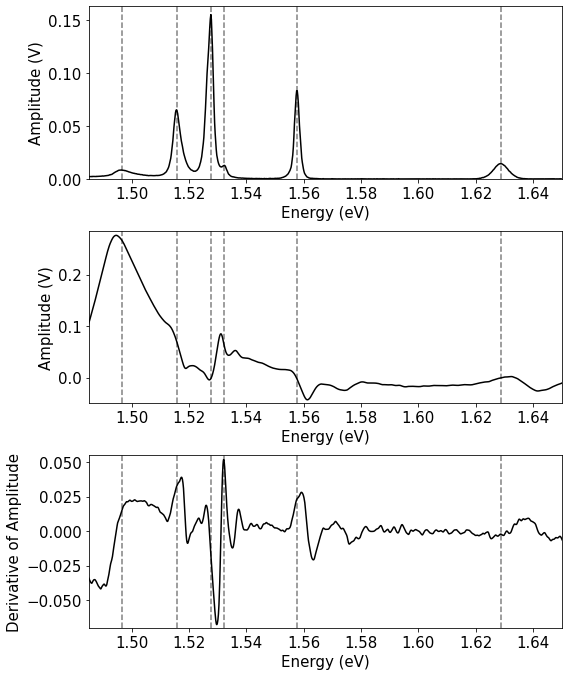

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(8,9.5))

for peak in PL_peaks:
    ax0.axvline(x=Energy(peak), color='gray',linestyle='--')
ax0.plot(Energy(PL['Wavelength']), PL['Voltage'], color='k')
ax0.set_xlabel('Energy (eV)', size=15)
ax0.set_ylabel('Amplitude (V)', size=15)
ax0.set_xlim(1.485,1.65)
ax0.set_ylim(0,None)
ax0.tick_params(labelsize=15)

for peak in PL_peaks:
    ax1.axvline(x=Energy(peak), color='gray',linestyle='--')
ax1.plot(Energy(R['Wavelength']), sci.filtfilt(b, a, reflectivity), color='k')
ax1.set_xlabel('Energy (eV)', size=15)
ax1.set_ylabel('Amplitude (V)', size=15)
ax1.set_xlim(1.485,1.65)
ax1.set_ylim(-0.05,0.285)
ax1.tick_params(labelsize=15)

for peak in PL_peaks:
    ax2.axvline(x=Energy(peak), color='gray',linestyle='--')
ax2.plot(Energy(R['Wavelength'][:-1]), diff_y, color='k')
ax2.set_xlabel('Energy (eV)', size=15)
ax2.set_ylabel('Derivative of Amplitude', size=15)
ax2.set_xlim(1.485,1.65)
ax2.set_ylim(-0.07,0.055)
#ax2.scatter([Energy(R['Wavelength'][index]) for index in chosen_peaks], 
 #           [diff_y[index] for index in chosen_peaks], marker='x', color='r')
ax2.tick_params(labelsize=15)

fig.tight_layout()

plt.show()

In [ ]:
energies = [peak_E[3], peak_E[5], peak_E[6], peak_E[7], peak_E[8], peak_E[10], peak_E[11], peak_E[12]]
energies.sort()
energies.reverse()
energies

[1.5760035392551195,
 1.5633843822356757,
 1.5592554666817615,
 1.5533947056718695,
 1.5320877161964814,
 1.5260532763025447,
 1.5173687239407692,
 1.5010193514915287]

In [ ]:
PL_energy = [Energy(peak) for peak in PL_peaks]
PL_energy

[1.6287992437362093,
 1.5575904325778926,
 1.5323717517389723,
 1.5276515331838374,
 1.5156992473496365,
 1.4964900233337386]